# 確率的勾配降下法ADALINEの実装

In [2]:
import numpy as np
from numpy.random import seed

class AdalineSGD(object):
    """ADAptive LInear NEuron分類器

    パラメータ
    ------------
    eta : float
        学習率（0.0よりも大きく1.0より小さい）
    n_iter : int
        トレーニングデータのトレーニング回数
    shuffle : bool（デフォルト：True）
        Trueの場合は、循環を回避するためにエポックごとにトレーニングデータをシャッフル
    random_state : int
        重みを初期化するための乱数シード

    属性
    -----------
    w_ : 1次元配列
        適合後の重み
    cost_ : リスト
        各エポックで全てのトレーニングサンプルの平均を求める誤差平方和コスト関数
        

    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        # 学習率の初期化
        self.eta = eta
        # トレーニング回数の初期化
        self.n_iter = n_iter
        # 重みの初期化フラグはFalseに設定
        self.w_initialized = False
        # 各エポックでトレーニングデータをシャッフルするかどうかのフラグを初期化
        self.shuffle = shuffle
        # 乱数シードを設定
        self.random_state = random_state

    def fit(self, X, y):
        """トレーニングデータに適合させる

        パラメータ
        -----------
        X: {配列のようなデータ構造}, shape = [n_sample, n_features]
            トレーニングデータ
            n_samples刃サンプルの個数, n_featuresは特徴量の個数
        y: 配列のようなデータ構造, shape = [n_samples]
            目的変数

        戻り値
        ----------
        self : object

        """
        # 重みベクトルの生成
        self._initialized_weights(X.shape[1])
        # コストを格納するリストの生成
        self.cost_ = []
        # トレーニング回数分トレーニングデータを反復
        for i in range(sef.n_iter):
            # 指定された場合はトレーニングデータをシャッフル
            if self.shuffle:
                X, y = self._shuffle(X, y)
            # 各サンプルのコストを格納するリストの生成
            cost = []
            # 各サンプルに対する計算
            for xi, target in zip(X, y):
                # 特徴量xiと目的変数yを用いた重みの更新とコストの計算
                cost.append(self._update_weights(xi, target))
            # サンプルの平均コストの計算
            avg_cost = sum(cost) / len(y)
            # 平均コストを格納
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        """重みを再初期化することなくトレーニングデータに適合させる"""
        # 初期化されていない場合は初期化を実行
        if not self.w_initialized:
            self._initialized_weights(X.shape[1])
        # 目的変数yの要素数が2以上の場合は
        # 各サンプルの特徴量xiと目的変数targetで重みを更新
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        # 目的変数yの要素数が1の場合は
        # サンプル全体の特徴量Xと目的変数yで重みを更新
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        """トレーニングデータをシャッフル"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """重みを小さな乱数に初期化"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """ADALINEの学習規則を用いて重みを更新"""
        # 活性化関数の出力の計算
        output = self.activation(self.net_input(xi))
        # 誤差y_i - Φ(z_i)の計算
        error = (target - output)
        # 重み w1, ..., wmの更新
        self.w_[1:] += self.eta * xi.dot(error)
        # 重みw0の更新：Δw0 = ηΣ(y_i - Φ(z_i))
        self.w_[0] += self.eta * error
        # コスト関数の計算J(w) = 1/2 Σ_i(y_i - Φ(z_i))^2
        cost = 0.5 * (errors**2)

    def net_input(self, X):
        """総入力を計算"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """線形活性化関数の出力を計算"""
        return X
    
    def predict(self, X):
        """1ステップ後のクラスラベルを返す"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

# パーセプトロン検証のための準備

In [3]:
# 実装したクラスをテスト用の準備
# webからirsデータを読み込み
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

c:\users\cross\appdata\local\programs\python\python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\cross\appdata\local\programs\python\python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [ ]:
# 目的変数の変換と説明変数の可視化
import matplotlib.pyplot as plt
import numpy as np

# 1-100行目の目的変数の抽出
y = df.iloc[0:100, 4].values
# Iris-setosaを-1, Iris-versicolorを1に変換
y = np.where(y == 'Iris-setosa', -1, 1)
# 1-100行目の1, 3列目の抽出
X = df.iloc[0:100, [0, 2]].values
# 品種 setosaのプロット（赤の〇）
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
# 品種 versicolorのプロット（青の×）
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
# 軸ラベルの設定
plt.xlabel('sepal length[cm]')
plt.ylabel('petal length[cm]')
# 凡例の設定（左上に配置）
plt.legend(loc='upper left')
# 図の表示
plt.show()

In [ ]:
# 決定境界の可視化
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                          np.arange(x2_min, x2_max, resolution))
    # 各特徴量を1次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # 予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    # グリッドポイントの等高線プロット
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                   y=X[y == cl, 1], 
                   alpha = 0.8, 
                   c=colors[idx], 
                   marker=markers[idx], 
                   label=cl, 
                   edgecolor='black')

In [ ]:
# 描画領域を1行2列に分割
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
# 勾配降下法によるADALINEの学習（学習率 eta=0.01)
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
# エポック数とコストの関係を表す折れ線グラフのプロット（縦軸のコストは常用対数）
ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o')
# 軸ラベルの設定
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
# タイトルの設定
ax[0].set_title('Adaline - learning rate 0.01')
# 勾配降下法によるADALINEの学習（学習率 eta=0.0001)
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
# エポック数とコストの関係を表す折れ線グラフのプロット
ax[1].plot(range(1, len(ada2.cost_)+1), ada2.cost_, marker='o')
# 軸ラベルの設定
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
# タイトルの設定
ax[1].set_title('Adaline - learning rate 0.0001')
# 図の表示
plt.show()

In [23]:
# 勾配降下法の収束を速度UPするために特徴量を標準化
# データのコピー
X_std = np.copy(X)
# 各列の標準化
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

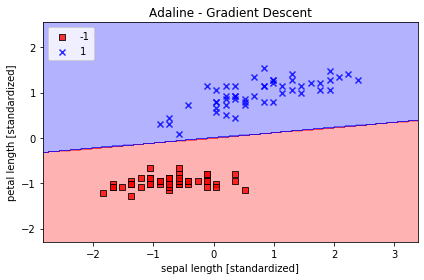

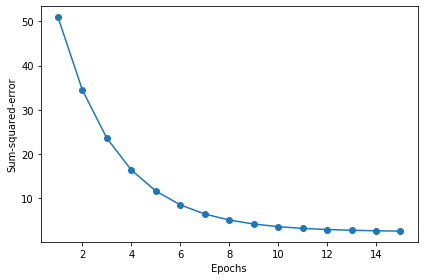

In [25]:
# 確率的勾配降下法によるADALINEの学習（標準化後、学習率eta=0.01)
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
# モデルの適合
ada.fit(X_std, y)
# 境界領域のプロット
plot_decision_regions(X_std, y, classifier=ada)
# タイトルの設定
plt.title('Adaline - Stochastic Gradient Descent')
# 軸ラベルの設定
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
# 凡例の設定（左上に配置）
plt.legend(loc='upper left')
# 図の表示
plt.tight_layout()
plt.show()
# エポック数とコストの関係を表す折れ線グラフのプロット
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
# 軸ラベルの設定
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
# 図の表示
plt.show()